In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

# csv datotekam odstrani vse razen ene vrstice z besedilom (seconds, volt, volt, volt)

data = pd.read_csv('meritve/CSV1/SDS00001.csv', delimiter=',')
data = np.array(data)
t = data[:, 0]

cond = -10 * 1e-6 < t

t = t[cond]

U1 = data[:, 1]
U1 = U1[cond]

U2 = data[:, 2]
U2 = U2[cond]

step = data[:, 3]


fig, axs = plt.subplots(2, 1)

axs[0].scatter(1e6 * t, 1e3 * U1, marker='o', color='k', s=8, alpha=0.5)
axs[1].scatter(1e6 * t, 1e3 * U2, marker='o', s=8, alpha=0.5)

# ind. za maksimume in minimume U1

n = 0

t_slice = 16e-6

ind_max, ind_min = [], []
slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
while np.any(slice_ind):
    ind_max.append(np.argmax((U1 + 10) * slice_ind))
    ind_min.append(np.argmin((U1 - 10) * slice_ind))
    n += 1
    slice_ind = (t > (n * t_slice - 0)) * (t < ((n + 1) * t_slice - 0))

axs[0].scatter(1e6 * t[ind_max], 1e3 * U1[ind_max], marker='o', color='r', s=8, alpha=0.5)
axs[0].scatter(1e6 * t[ind_min], 1e3 * U1[ind_min], marker='o', color='r', s=8, alpha=0.5)

#ind. za maksimume in minimume U2

n = 0

ind_max, ind_min = [], []
slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
while np.any(slice_ind):
    ind_max.append(np.argmax((U2 + 10) * slice_ind))
    ind_min.append(np.argmin((U2 - 10) * slice_ind))
    n += 1
    slice_ind = (t > (n * t_slice - 0)) * (t < ((n + 1) * t_slice - 0))

axs[1].scatter(1e6 * t[ind_max], 1e3 * U2[ind_max], marker='o', color='r', s=8, alpha=0.5)
axs[1].scatter(1e6 * t[ind_min], 1e3 * U2[ind_min], marker='o', color='r', s=8, alpha=0.5)

In [3]:
from matplotlib.ticker import AutoMinorLocator

def prvi_del(ime, C, t_slice, t0=0):

    # csv datotekam odstrani vse razen ene vrstice z besedilom (seconds, volt, volt, volt)

    data = pd.read_csv(ime, delimiter=',')
    data = np.array(data)
    t = data[:, 0]

    cond = -10 * 1e-6 < t #vse meritve večje od 10 * 1e-6

    t = t[cond]

    U1 = data[:, 1]
    U1 = U1[cond]

    U2 = data[:, 2]
    U2 = U2[cond]


    fig, axs = plt.subplots(2, 1)

    axs[0].scatter(1e6 * t, 1e3 * U1, marker='o', color='k', s=8, alpha=0.5, label=r'meritve')
    axs[1].scatter(1e6 * t, 1e3 * U2, marker='o', s=8, alpha=0.5, label=r'meritve')

    # ind. za maksimume in minimume U1

    n = 0

    ind_max, ind_min = [], []
    slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
    while np.any(slice_ind):
        ind_max.append(np.argmax((U1 + 10) * slice_ind))
        ind_min.append(np.argmin((U1 - 10) * slice_ind))
        n += 1
        slice_ind = (t > (n * t_slice - t0)) * (t < ((n + 1) * t_slice - t0))

    axs[0].scatter(1e6 * t[ind_max], 1e3 * U1[ind_max], marker='o', color='r', s=8, alpha=0.5)
    axs[0].scatter(1e6 * t[ind_min], 1e3 * U1[ind_min], marker='o', color='r', s=8, alpha=0.5)

    #ind. za maksimume in minimume U2

    n = 0

    ind_max, ind_min = [], []
    slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
    while np.any(slice_ind):
        ind_max.append(np.argmax((U2 + 10) * slice_ind))
        ind_min.append(np.argmin((U2 - 10) * slice_ind))
        n += 1
        slice_ind = (t > (n * t_slice - t0)) * (t < ((n + 1) * t_slice - t0))

    axs[1].scatter(1e6 * t[ind_max], 1e3 * U2[ind_max], marker='o', color='r', s=8, alpha=0.5)
    axs[1].scatter(1e6 * t[ind_min], 1e3 * U2[ind_min], marker='o', color='r', s=8, alpha=0.5)

    for i, ax in enumerate(axs): 
        ax.set_title(f'Potek $U_{i + 1}$ pri $C_0 = {C} pF$')
        ax.set_xlabel(r'$t [\mu s]$')
        ax.set_ylabel(r'$U [mV]$')
        ax.legend()
        ax.set_axisbelow(True)
        ax.grid()
        ax.grid(which='minor', linestyle=':')
        ax.xaxis.set_minor_locator(AutoMinorLocator(10))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    fig.tight_layout()
    fig.savefig(f'C{C}.pdf')

In [4]:
prvi_del('meritve/CSV1/SDS00001.csv', 0, 16e-6) #prvi parameter je ime datoteke, drugi je kapaciteta kondenzatorja in tretje ne spreminjaj
prvi_del('meritve/CSV1/SDS00002.csv', 150, 16e-6)
prvi_del('meritve/CSV1/SDS00003.csv', 330, 16e-6)
prvi_del('meritve/CSV1/SDS00004.csv', 560, 16e-6)
prvi_del('meritve/CSV1/SDS00005.csv', 820, 16e-6)
prvi_del('meritve/CSV1/SDS00006.csv', 1150, 16e-6)

In [4]:
def omega (N, Nt_0, dNt_0): 
    Nt_0 = unp.uarray([Nt_0], [dNt_0])
    return 2 * np.pi * Nt_0

In [13]:
 def domega_dBeta(T_0, dT_0, U_0, dU_0, bU_T_0, dU_T_0):
    T_0 = unp.uarray([T_0], [dT_0])
    U_0 = unp.uarray([U_0], [dU_0])
    bU_T_0 = unp.uarray([bU_T_0], [dU_T_0])
    omega = 2*np.pi / T_0
    beta = 1/T_0 * unp.log(U_0 / bU_T_0)
    return omega, beta 

In [11]:
# U1 

omegaU1a = omega(14, 200e-6, 5e-6) #število maksimumov, čas teh maksimumov + napaka za čas
omegaU1b = omega(27, 400e-6, 5e-6)
omegaU1c = omega(38, 580e-6, 5e-6)
omegaU1d = omega(37, 600e-6, 5e-6)
omegaU1e = omega(37, 635e-6, 5e-6)
omegaU1f = omega(36, 630e-6, 5e-6)

omegaU1 = unp.matrix([omegaU1a, omegaU1b, omegaU1c, omegaU1d, omegaU1e, omegaU1f])

print(omegaU1 * 1e3)

print(a2l.to_ltx(unp.nominal_values(omegaU1) * 1e3, frmt='{:6.2f}', arraytype='array'))

# U2

omegaU2a = omega(22, 310e-6, 5e-6)
omegaU2b = omega(33, 500e-6, 5e-6)
omegaU2c = omega(40, 600e-6, 5e-6)
omegaU2d = omega(21, 310e-6, 5e-6)
omegaU2e = omega(21, 340e-6, 5e-6)
omegaU2f = omega(30, 500e-6, 5e-6)

omegaU2 = unp.matrix([omegaU2a, omegaU2b, omegaU2c, omegaU2d, omegaU2e, omegaU2f])

print(a2l.to_ltx(unp.nominal_values(omegaU2) * 1e3, frmt='{:6.2f}', arraytype='array'))


[[1.2566370614359172+/-0.031415926535897934]
 [2.5132741228718345+/-0.031415926535897934]
 [3.64424747816416+/-0.031415926535897934]
 [3.7699111843077513+/-0.031415926535897934]
 [3.9898226700590373+/-0.031415926535897934]
 [3.958406743523139+/-0.031415926535897934]]
\begin{array}
    1.26\\
    2.51\\
    3.64\\
    3.77\\
    3.99\\
    3.96
\end{array}
None
\begin{array}
    1.95\\
    3.14\\
    3.77\\
    1.95\\
    2.14\\
    3.14
\end{array}
None


In [55]:
# U1

domegaU1a, betaU1a = domega_dBeta(200e-6, 5e-6, 8.2e-3, 0.2e-3, 1e-3, 0.2e-3) # čas od maksimuma do kasnejšega maksimuma, napaka časa, maksimum + napaka, maksimum kasneje + napaka 
domegaU1b, betaU1b = domega_dBeta(260e-6, 5e-6, 8.2e-3, 0.5e-3, 1.5e-3, 0.5e-3)
domegaU1c, betaU1c = domega_dBeta(340e-6, 5e-6, 8e-3, 0.5e-3, 1e-3, 0.5e-3)
domegaU1d, betaU1d = domega_dBeta(350e-6, 5e-6, 8e-3, 0.5e-3, 1e-3, 0.5e-3)
domegaU1e, betaU1e = domega_dBeta(370e-6, 5e-6, 7.5e-3, 0.5e-3, 1e-3, 0.5e-3)
domegaU1f, betaU1f = domega_dBeta(310e-6, 5e-6, 7e-3, 0.5e-3, 1e-3, 0.5e-3)

dataO = np.array([unp.nominal_values([domegaU1a, domegaU1b, domegaU1c, domegaU1d, domegaU1e, domegaU1f]), unp.std_devs([domegaU1a, domegaU1b, domegaU1c, domegaU1d, domegaU1e, domegaU1f]), unp.nominal_values([betaU1a, betaU1b, betaU1c, betaU1d, betaU1e, betaU1f]), unp.std_devs([betaU1a, betaU1b, betaU1c, betaU1d, betaU1e, betaU1f])])

datao = np.squeeze(dataO, axis=2).T * 1e-3

print(a2l.to_ltx(datao, frmt='{:6.2f}', arraytype='array'))

# U2 

domegaU2a, betaU2a = domega_dBeta(280e-6, 5e-6, 2.4e-3, 0.2e-3, 0.4e-3, 0.2e-3)
domegaU2b, betaU2b = domega_dBeta(355e-6, 5e-6, 3.75e-3, 0.3e-3, 0.5e-3, 0.3e-3)
domegaU2c, betaU2c = domega_dBeta(400e-6, 5e-6, 5e-3, 0.5e-3, 0.5e-3, 0.5e-3)
domegaU2d, betaU2d = domega_dBeta(265e-6, 5e-6, 6e-3, 0.5e-3, 1e-3, 0.5e-3)
domegaU2e, betaU2e = domega_dBeta(270e-6, 5e-6, 6e-3, 0.5e-3, 1e-3, 0.5e-3)
domegaU2f, betaU2f = domega_dBeta(220e-6, 5e-6, 6e-3, 0.5e-3, 1e-3, 0.5e-3)

data2 = np.array([unp.nominal_values([domegaU2a, domegaU2b, domegaU2c, domegaU2d, domegaU2e, domegaU2f]), unp.std_devs([domegaU2a, domegaU2b, domegaU2c, domegaU2d, domegaU2e, domegaU2f]), unp.nominal_values([betaU2a, betaU2b, betaU2c, betaU2d, betaU2e, betaU2f]), unp.std_devs([betaU2a, betaU2b, betaU2c, betaU2d, betaU2e, betaU2f])])

data2 = np.squeeze(data2, axis=2).T * 1e-3

print(a2l.to_ltx(data2, frmt='{:6.2f}', arraytype='array'))



\begin{array}
   31.42 &    0.79 &   10.52 &    1.04\\
   24.17 &    0.46 &    6.53 &    1.31\\
   18.48 &    0.27 &    6.12 &    1.48\\
   17.95 &    0.26 &    5.94 &    1.44\\
   16.98 &    0.23 &    5.45 &    1.37\\
   20.27 &    0.33 &    6.28 &    1.63
\end{array}
None
\begin{array}
   22.44 &    0.40 &    6.40 &    1.81\\
   17.70 &    0.25 &    5.68 &    1.71\\
   15.71 &    0.20 &    5.76 &    2.51\\
   23.71 &    0.45 &    6.76 &    1.92\\
   23.27 &    0.43 &    6.64 &    1.88\\
   28.56 &    0.65 &    8.14 &    2.31
\end{array}
None


(array([420973.4155810323+/-2000.0], dtype=object),
 array([12566.370614359155+/-2000.0], dtype=object),
 array([33.50000000000005+/-5.33406551155534], dtype=object))

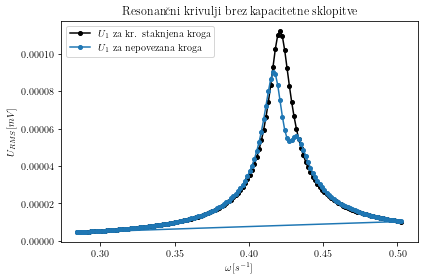

In [11]:
data = np.loadtxt('meritve/2del.dat') #kratko staknjen krog
data_b = np.loadtxt('meritve/21del.dat') #nepovezana kroga

data[:, 0] = data[:, 0] * 2 * np.pi
data_b[:, 0] = data_b[:, 0] * 2 * np.pi

omega1 = data[:, 0]
U01 = data[:, 1]

omega_b = data_b[:, 0]
U0_b = data_b[:, 1]

fig, ax = plt.subplots()

ax.plot(1e-6 * omega1, 1e-3 * U01, color='k', marker='o', markersize=4, label='$U_1$ za kr. staknjena kroga')
ax.plot(1e-6 * omega_b, 1e-3 * U0_b, marker='o', markersize=4, label='$U_1$ za nepovezana kroga')

# računanje dobrote

max_i = np.argmax(U01)
omega = unp.uarray([omega1[max_i]], 0.002e6)

# FWHM for U_RMS

U_0_max = np.max(U01)
s = np.flatnonzero(U01 > U_0_max / np.sqrt(2))
i_L, i_R = s[0], s[-1]
domega = unp.uarray([omega1[i_R] - omega1[i_L]], 0.002e6)

Q = omega/domega

ax.set_title('Resonančni krivulji brez kapacitetne sklopitve')
ax.set_xlabel(r'$\omega [s^{-1}]$')
ax.set_ylabel(r'$U_{RMS} [mV]$')
ax.legend()
fig.tight_layout()
fig.savefig('vsiljenoU1.pdf')

omega, domega, Q

[0.4131194339470578+/-0.0015707963267948943] [0.43039819354180164+/-0.0015707963267948943]
[0.42882739721500673+/-0.0015707963267948943] [0.43039819354180164+/-0.0015707963267948943]
[0.42882739721500673+/-0.0015707963267948943] [0.43039819354180164+/-0.0015707963267948943]
[0.42882739721500673+/-0.0015707963267948943] [0.43039819354180164+/-0.0015707963267948943]
[0.42882739721500673+/-0.0015707963267948943] [0.43039819354180164+/-0.0015707963267948943]


(array([[41.31194339,  0.15707963],
        [42.88273972,  0.15707963],
        [42.88273972,  0.15707963],
        [42.88273972,  0.15707963],
        [42.88273972,  0.15707963]]),
 array([[43.03981935,  0.15707963],
        [43.03981935,  0.15707963],
        [43.03981935,  0.15707963],
        [43.03981935,  0.15707963],
        [43.03981935,  0.15707963]]))

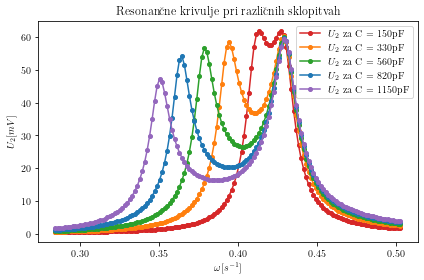

In [62]:
fig, ax = plt.subplots()

aux = [['meritve/resU2-150.dat', 'meritve/resU2-330.dat', 'meritve/resU2-560.dat', 'meritve/resU2-820.dat', 'meritve/resU2-1150.dat'], 
[150, 330, 560, 820, 1150], ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple']] #imena datotek, kapaciteta, barva

arr1 = np.ones((5, 2))
arr2 = np.ones((5, 2))

i = 0

for name, C, color in zip(*aux):
    data = np.loadtxt(name)
    omega = 2 * np.pi * data[:, 0]
    U = data[:, 1]

    ax.plot(1e-6 * omega, 1e3 * U, color=color, label=f'$U_2$ za C = {C}pF', marker='o', markersize=4)

    # računanje delta omege

    omega_tresh = 0.43e6
    max_ind = [np.argmax(U * (omega < omega_tresh)), np.argmax(U * (omega > omega_tresh))] # poišče maksimum pred in po omega_tresh
    n, m = max_ind
    omega1 = unp.uarray([omega[n]], [np.mean(np.diff(omega[n-1:n+2]))])
    omega2 = unp.uarray([omega[m]], [np.mean(np.diff(omega[m-1:m+2]))])
    print(omega1 * 1e-6, omega2 * 1e-6)
    arr1[i, 0] = unp.nominal_values(omega1) * 1e-4
    arr1[i, 1] = unp.std_devs(omega1) * 1e-4
    arr2[i, 0] = unp.nominal_values(omega2) * 1e-4
    arr2[i, 1] = unp.std_devs(omega2) * 1e-4
    i += 1

ax.set_title('Resonančne krivulje pri različnih sklopitvah')
ax.set_xlabel(r'$\omega [s^{-1}]$')
ax.set_ylabel(r'$U_2 [mV]$')
ax.legend()
fig.tight_layout()
fig.savefig('vsiljenoU2.pdf')

arr1, arr2

In [81]:
data = np.concatenate((arr1, arr2), axis=1)

print(data)

print(a2l.to_ltx(data, frmt='{:6.1f}', arraytype='array'))



[[41.31194339  0.15707963 43.03981935  0.15707963]
 [42.88273972  0.15707963 43.03981935  0.15707963]
 [42.88273972  0.15707963 43.03981935  0.15707963]
 [42.88273972  0.15707963 43.03981935  0.15707963]
 [42.88273972  0.15707963 43.03981935  0.15707963]]
\begin{array}
    41.3 &     0.2 &    43.0 &     0.2\\
    42.9 &     0.2 &    43.0 &     0.2\\
    42.9 &     0.2 &    43.0 &     0.2\\
    42.9 &     0.2 &    43.0 &     0.2\\
    42.9 &     0.2 &    43.0 &     0.2
\end{array}
None
